In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
case = "fanv3_improving"
path = "/glade/scratch/jinmuluo/archive/fanv3_improving/lnd/hist/" 

start_date = date(2017, 1, 1)
end_date = date(2017, 12, 1)
delta = end_date - start_date

Vars = [ 'NOx_NITRIFY_TOTAL', 'NOx_DENITRIFY_TOTAL', 'area', 'landfrac']

fanCLM = []
for i in range(delta.days//30 + 1):
    month = start_date + relativedelta(months=i)
    month = month.strftime('%Y-%m')
    fanCLM.append(path + case + ".clm2.h0" + "." + month +".nc")

def preprocess(ds, fields = Vars):
    return(ds[fields])

def fix_time(ds):  
    date0 = ds['time'][0].values
    date1 = ds['time'][-1].values
    # ds['time'] =xr.cftime_range(str(yr0),periods=ndays,freq='D')
    ds['time'] = pd.date_range(str(date0),str(date1),freq='MS') 
    
    return ds

dsCLM = fix_time(xr.open_mfdataset(fanCLM, decode_times=True, preprocess=preprocess))
dsCLM

<xarray.Dataset>
Dimensions:              (time: 12, lat: 96, lon: 144)
Coordinates:
  * time                 (time) datetime64[ns] 2017-02-01 ... 2018-01-01
  * lon                  (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                  (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Data variables:
    NOx_NITRIFY_TOTAL    (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NOx_DENITRIFY_TOTAL  (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    area                 (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    landfrac             (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes: (12/101)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 06/11/23 21:52:59
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    Time_constant_3Dvars_filename:        ./fanv3_improving.clm2.h0.2000-01.nc
    Time_constant_3Dvars:                 ZSOI:DZSOI:WATSAT:SUCSAT:BSW:HKSAT:...

In [3]:
d1 = dsCLM['NOx_NITRIFY_TOTAL'].fillna(0).values.flatten()
d2 = dsCLM['NOx_DENITRIFY_TOTAL'].fillna(0).values.flatten()
xy = np.vstack([d1,d2])
z = gaussian_kde(xy)(xy)

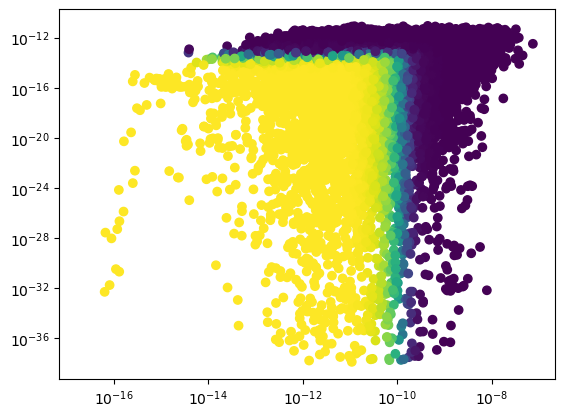

In [4]:
fig, ax = plt.subplots()
ax.scatter(d1, d2, c=z)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()